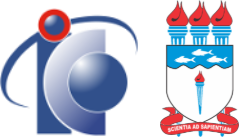

> ## **UNIVERSIDADE FEDERAL DE ALAGOAS - UFAL**
> ### **INSTITUTO DE COMPUTAÇÃO - IC**
> #### Nome: **Bruno Lemos de Lima** &emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; **|**&emsp;&emsp; Matrícula: **19110935**
> #### Nome: **Karla Sophia Santana da Cruz**&emsp;&nbsp; **|**&emsp;&emsp; Matrícula: **19111113**
> #### Curso: **Engenharia de Computação** &emsp;&emsp; **|** &emsp;&emsp;Período: **2023.1**

> # **Processamento de Linguagem Natural - Thales Vieira**
> # **Lista 2**




#### requirements

In [5]:
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import random

In [6]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


import umap.umap_ as umap

In [7]:
plt.style.use('ggplot')

#### dataset movies_genre

In [8]:
parquet_url = 'https://github.com/karlasophiacruz/nlp-2023.1/raw/main/dataset/movie_genre_pre_processed.parquet'
parquet_content = requests.get(parquet_url).content
parquet_file = io.BytesIO(parquet_content)

In [9]:
df = pd.read_parquet(parquet_file)
df = df.drop(columns='column0')
df.head()

,id,class,text,original_text,vectors,stemmed
0,38401,fantasy,monster high welcome monster high dracula m...,Monster High: Welcome to Monster High: When Dr...,"[2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['monst', 'high', 'welcom', 'monst', 'high', '..."
1,44720,fantasy,yanka el espíritu del volcán year old girl...,Yanka y el espíritu del volcán: A 13 year old ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","['yank', 'el', 'espíritu', 'del', 'volcán', 'y..."
2,38032,fantasy,xia qing du meng fei fresh kung fu training...,You xia qing: Du Meng Fei fresh out of Kung-Fu...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","['xia', 'qing', 'du', 'meng', 'fei', 'fresh', ..."
3,40538,fantasy,beast bodmin moor nicholas felt jacob crims...,The Beast of Bodmin Moor: Nicholas Felt and Ja...,"[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['beast', 'bodmin', 'moor', 'nichola', 'felt',..."
4,38634,fantasy,captain yagit street scum becomes leader,Captain Yagit: A STREET SCUM BECOMES A LEADER.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","['captain', 'yagit', 'street', 'scum', 'becom'..."


In [10]:
print(df.head())

      id    class                                               text  \
0  38401  fantasy  monster high  welcome  monster high  dracula m...   
1  44720  fantasy  yanka  el espíritu del volcán    year old girl...   
2  38032  fantasy   xia qing du meng fei fresh   kung fu training...   
3  40538  fantasy   beast  bodmin moor nicholas felt  jacob crims...   
4  38634  fantasy        captain yagit  street scum becomes  leader    

                                       original_text  \
0  Monster High: Welcome to Monster High: When Dr...   
1  Yanka y el espíritu del volcán: A 13 year old ...   
2  You xia qing: Du Meng Fei fresh out of Kung-Fu...   
3  The Beast of Bodmin Moor: Nicholas Felt and Ja...   
4     Captain Yagit: A STREET SCUM BECOMES A LEADER.   

                                             vectors  \
0  [2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   
3  [0,

### Nas questões abaixo, você não está sendo avaliado pela implementação, mas pela sua capacidade de análise dos métodos aplicados em sua base (escolha dos hiperparâmetros, discussão sobre os resultados dentre os diferentes métodos, etc.). Respostas somente com implementação não serão avaliadas.

### **1.** Elabore um problema de classificação binária de textos coerente com sua base.

#### **a)** Determine o rótulo dos documentos (separando os documentos em classes bem definidas).

#### **b)** Extraia as representações vetoriais com CountVectorizer e TF-IDF, considerando os textos já processados como na primeira lista.

#### **c)** Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão, métricas de acurácia, precisão, recall e F1 score.

#### **d)** Faça o mesmo para o classificador Naive-Bayes.

#### **e)** Faça o mesmo para o classificador SVM com kernel linear.

#### **f)** Compare os 6 resultados.

### **2.** Realize um comparativo entre os métodos LDA, SVD e NMF para realizar modelagem de tópicos. Para cada método:

#### **a)** empiricamente, tente identificar uma quantidade de tópicos adequada para seu problema. Exiba resultados que justifiquem a quantidade de tópicos escolhida;

Para identificar uma quantidade de tópicos adequada para o problema, foi utilizado o modelo da Coerência de Tópicos, que é uma medida de avaliação de tópicos que pode ser usada para estimar o número de tópicos em um corpus de texto. A coerência de tópicos é uma medida de qualidade de tópicos que é usada para avaliar modelos de tópicos e como eles correspondem a tópicos humanos interpretáveis.

Dessa forma, foi aplicado o modelo de Coerência de Tópicos utilizando o modelo de LDA como exemplo, no intervalo de 2 a 16 tópicos, sendo obtido o gráfico abaixo:

In [11]:
documents = df['stemmed'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(text) for text in documents]

In [12]:
coherence_scores = []

for k in range(2, 16):
    lda_model = LdaModel(corpus, num_topics=k, id2word=dictionary)
    coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))


In [13]:
best_k = max(coherence_scores, key=lambda x: x[1])[0]

k_values = [score[0] for score in coherence_scores]
coherence_values = [score[1] for score in coherence_scores]

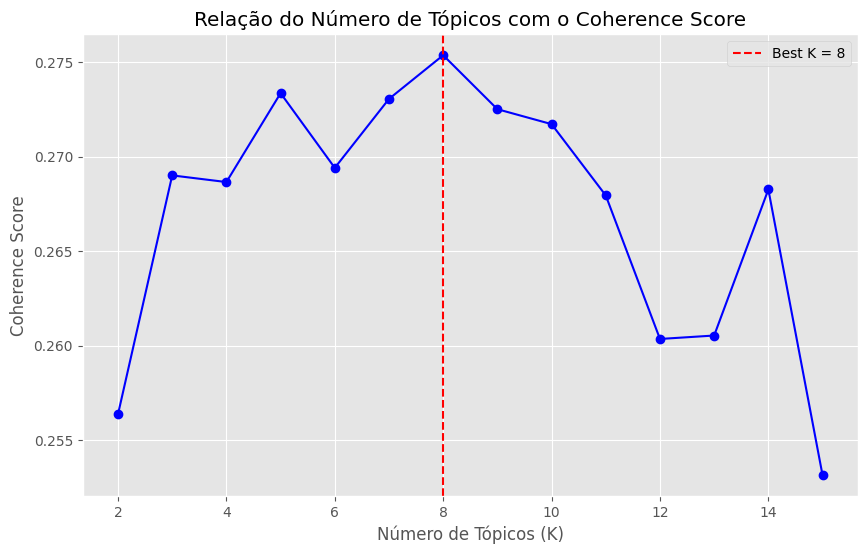

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, coherence_values, marker='o', linestyle='-', color='b')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.xlabel("Número de Tópicos (K)")
plt.ylabel("Coherence Score")
plt.title("Relação do Número de Tópicos com o Coherence Score")
plt.grid(True)
plt.legend()
plt.show()


A partir do gráfico, percebe-se que o número de tópicos que apresenta o maior valor de coerência é 7, sendo assim, esse valor foi escolhido para o problema.

#### **b)** identifique as 5 palavras mais relevantes de cada tópico;

##### Executando os algoritmos

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['stemmed'])

In [16]:
lda = LatentDirichletAllocation(n_components=best_k, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=8, random_state=42)

In [17]:
svd = TruncatedSVD(n_components=best_k, random_state=42)
svd.fit(X)

TruncatedSVD(n_components=8, random_state=42)

In [18]:
nmf = NMF(n_components=best_k, random_state=42)
nmf.fit(X)

c:\Users\karla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=8, random_state=42)

In [19]:
def print_top_words(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(f"Topic #{topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
    
    return topics

n_top_words = 5
feature_names = tfidf_vectorizer.get_feature_names_out()


##### 5 tópicos mais relevantes do LDA

In [20]:
lda_topics = print_top_words(lda, feature_names, n_top_words)

Topic #0:
lov, film, man, story, kil

Topic #1:
lov, famy, man, young, liv

Topic #2:
story, young, bear, liv, film

Topic #3:
murd, kil, man, young, wom

Topic #4:
world, group, surv, young, lif

Topic #5:
story, man, young, lov, wom

Topic #6:
lif, lov, man, world, sci

Topic #7:
mystery, young, lov, man, world



##### 5 tópicos mais relevantes do SVD

In [21]:

svd_topics = print_top_words(svd, feature_names, n_top_words)

Topic #0:
young, man, lov, wom, lif

Topic #1:
lov, story, fal, wom, young

Topic #2:
murd, man, wom, kil, young

Topic #3:
story, film, kil, murd, lov

Topic #4:
man, world, young, film, wom

Topic #5:
lif, man, film, real, chang

Topic #6:
young, wom, mystery, girl, film

Topic #7:
lif, wom, town, smal, friend



##### 5 tópicos mais relevantes do NMF

In [22]:
nmf_topics = print_top_words(nmf, feature_names, n_top_words)

Topic #0:
world, group, tim, fight, war

Topic #1:
lov, fal, girl, story, marry

Topic #2:
murd, kil, investig, detect, pol

Topic #3:
story, film, bas, hor, tru

Topic #4:
man, wif, young, becom, marry

Topic #5:
lif, chang, real, new, dream

Topic #6:
wom, young, girl, husband, dream

Topic #7:
year, famy, old, boy, fath



#### **c)** identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você pode representar os tópicos por suas 5 palavras mais relevantes).

A partir dos tópicos definidos para cada modelo no item anterior, foram escolhidos 5 documentos aleatórios de uma classe específica para cada modelo, sendo exibidos abaixo os 3 tópicos mais relevantes de cada documento:

##### Escolhendo 5 documentos aleatórios de uma classe específica

In [23]:
df['class'].unique()

array(['fantasy', 'horror', 'family', 'scifi', 'action', 'crime',
       'adventure', 'mystery', 'romance', 'thriller'], dtype=object)

In [24]:
class_list = ['horror', 'scifi', 'romance', 'fantasy', 'crime']
class_indices = {class_name: [] for class_name in class_list}

for class_name in class_list:
    indices = df[df['class'] == class_name].index    
    random_index = random.choice(indices)
    
    class_indices[class_name] = random_index
    print(f"Random index for {class_name}: {random_index}")

Random index for horror: 1346
Random index for scifi: 3744
Random index for romance: 8942
Random index for fantasy: 410
Random index for crime: 5552


In [25]:
class_indices

{'horror': 1346, 'scifi': 3744, 'romance': 8942, 'fantasy': 410, 'crime': 5552}

##### 3 tópicos mais relevantes para cada documento

In [26]:
document_topic_distribution_lda = lda.transform(X)
document_topic_distribution_svd = svd.transform(X)
document_topic_distribution_nmf = nmf.transform(X)

In [27]:
for clas_name, idx in class_indices.items():
    print("------------------------------------------------------------------------------")
    print(f"Class Movie: {clas_name} | Movie Title: ", df.iloc[idx]['original_text'].split(":")[0])
    print("Synopsis: ", df.iloc[idx]['original_text'].split(":")[1])
    print()
    
    top_lda_topics = document_topic_distribution_lda[idx].argsort()[-3:][::-1]
    top_svd_topics = document_topic_distribution_svd[idx].argsort()[-3:][::-1]
    top_nmf_topics = document_topic_distribution_nmf[idx].argsort()[-3:][::-1]
    
    print(f"LDA Dominant Topics: {top_lda_topics}")
    for topic in top_lda_topics:
        print(lda_topics[topic])

    print(f"\nSVD Dominant Topics: {top_svd_topics}")
    for topic in top_svd_topics:
        print(svd_topics[topic])
        
    print(f"\nNMF Dominant Topics: {top_nmf_topics}")
    for topic in top_nmf_topics:
        print(nmf_topics[topic])
    print()


------------------------------------------------------------------------------
Class Movie: horror | Movie Title:  An Inappropriate Affect
Synopsis:   The new patient at Elm County Hospital is something of a celebrity. He wants out, but his mental health, or lack thereof - is an investment.

LDA Dominant Topics: [3 5 0]
['murd', 'kil', 'man', 'young', 'wom']
['story', 'man', 'young', 'lov', 'wom']
['lov', 'film', 'man', 'story', 'kil']

SVD Dominant Topics: [0 7 5]
['young', 'man', 'lov', 'wom', 'lif']
['lif', 'wom', 'town', 'smal', 'friend']
['lif', 'man', 'film', 'real', 'chang']

NMF Dominant Topics: [7 5 0]
['year', 'famy', 'old', 'boy', 'fath']
['lif', 'chang', 'real', 'new', 'dream']
['world', 'group', 'tim', 'fight', 'war']

------------------------------------------------------------------------------
Class Movie: scifi | Movie Title:  Whatever Happened to Pete Blaggit?
Synopsis:   A poignant yet humorous tale about the plight of a man stuck in a mid-life crisis and trying to r

#### **d)** qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

Com base nessas considerações, o modelo NMF parece ser o mais apropriado para a classificação de filmes com base nas sinopses. Ele gerou tópicos mais consistentes e relevantes em relação aos gêneros dos filmes, o que pode tornar mais fácil a tarefa de classificação. 

Isso pode ser analisado através dos tópicos mais relevantes para cada documento mostrado no item anterior, pois, como cada documento possui uma classe, o modelo NMF foi o que mais se aproximou dos gêneros dos filmes, sendo possível identificar os gêneros dos filmes a partir dos tópicos gerados.

### **3.** Realize um agrupamento dos dados usando a representação do Count-Vectorizer, seguindo os seguintes passos:

In [28]:
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['stemmed'])

#### **a)** Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a dimensão resultante dos dados projetados?

In [29]:
pca = PCA(n_components=0.95)

X_pca = pca.fit_transform(X_count.toarray())

dimension_resultante = X_pca.shape[1]

In [30]:
dimension_resultante

4095

#### **b)** Aplique um algoritmo $k$-means nos dados projetados, tentando usar o método $elbow$ para encontrar o valor de $k$ ótimo.

In [31]:
inertia_values = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

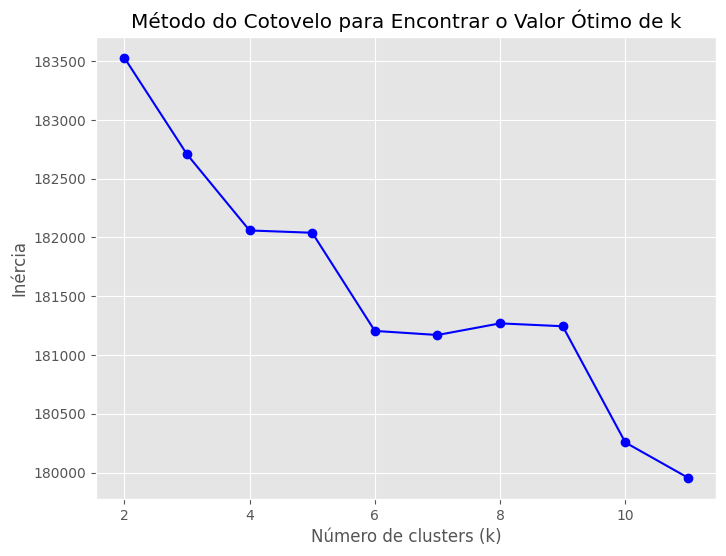

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 12), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Encontrar o Valor Ótimo de k')
plt.grid(True)
plt.show()

In [45]:
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
kmeans.fit(X_pca)
predict_kmeans = kmeans.labels_

### **4.** Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.

#### **a)** aplique os métodos de projeção multidimensional t-SNE e UMAP na representação CountVectorizer e plote os gráficos das projeções resultantes, colorindo os pontos de acordo com os grupos obtidos pelo k-means (questão 3b).

In [40]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X.toarray())

In [37]:
umap_model = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
umap_result = umap_model.fit_transform(X)

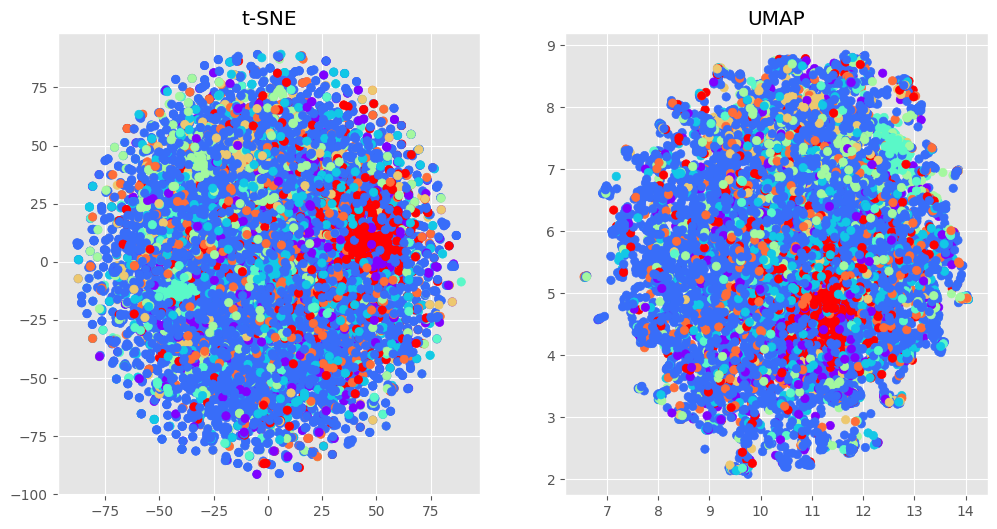

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=predict_kmeans, cmap='rainbow')
plt.title('t-SNE')

plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=predict_kmeans, cmap='rainbow')
plt.title('UMAP')

plt.show()


#### **b)** Experimente variar os hiperparâmetros perplexity do t-SNE e n neighbors do UMAP. O que acontece com as projeções quando estes parâmetros são calibrados para valores menores ou maiores do que seus valores padrão?

#### **c)** Usando os melhores valores encontrados para perplexity e n neighbors, compare o tempo de execução e a qualidade visual da projeção dos 2 métodos de projeção multidimensional (t-SNE e UMAP). Qual abordagem se saiu melhor em cada um desses aspectos?